Name: Christian Jay L. Cuevas <br>
Section: CPE32S3 <br>
Course: CPE 019 - Emerging Technologies 2 <br>
Instructor: Engr. Roman Richard

####OBJECTIVES

Part 1: The Dataset <br>
Part 2: Scatterplot Graphs and Correlatable Variables <br>
Part 3: Calculating Correlation with Python <br>
Part 4: Visualizing </b>

####SCENARIO/BACKGROUND

Correlation is an important statistical relationship that can indicate whether the variable values are
linearly related.
In this lab, you will learn how to use Python to calculate correlation. In Part 1, you will setup the dataset.
In Part 2, you will learn how to identify if the variables in a given dataset are correlatable. Finally, in Part
3, you will use Python to calculate the correlation between two sets of variable.

####REQUIRED RESOURCES

- 1 PC with Internet access <br>
- Raspberry Pi version 2 or higher <br>
- Python libraries: pandas, numpy, matplotlib, seaborn <br>
- Datafiles: brainsize.txt <br>

## <span style = "color:red;"> PART 1: THE DATASET </span>

 You will use a dataset that contains a sample of 40 right-handed Anglo Introductory Psychology
students at a large Southwestern university. Subjects took four subtests (Vocabulary, Similarities, Block
Design, and Picture Completion) of the Wechsler (1981) Adult Intelligence Scale-Revised. The
researchers used Magnetic Resonance Imaging (MRI) to determine the brain size of the subjects.
Information about gender and body size (height and weight) are also included. The researchers withheld
the weights of two subjects and the height of one subject for reasons of confidentiality. Two simple
modifications were applied to the dataset:
1. Replace the quesion marks used to represent the withheld data points described above by the
'NaN' string. The substitution was done because Pandas does not handle the question marks
correctly.
2. Replace all tab characters with commas, converting the dataset into a CSV dataset.
The prepared dataset is saved as brainsize.txt.

####Step 1: Loading the Dataset From a File.

Before the dataset can be used, it must be loaded onto memory.
In the code below, The first line imports the pandas modules and defines pd as a descriptor that refers to
the module.
The second line loads the dataset CSV file into a variable called brainFile.
The third line uses read_csv(), a pandas method, to convert the CSV dataset stored in brainFile into a
dataframe. The dataframe is then stored in the brainFrame variable.
Run the cell below to execute the described functions.

In [19]:
# Code cell 1
import pandas as pd   #import the pandas library to access the functions that we need
brainFile = '/content/brainsize.txt'  #call the txt file by getting its path
brainFrame = pd.read_csv(brainFile, sep = "\t")   #read the file and create dataframe

- **ANALYSIS:**

- Here in this block of code, we're creating a dataframe made of the brainsize.txt, the dataframe is a structure of data that arranges them into columns and rows. The name of the dataframe is brainFrame. The sep = "\t" was added because it does not automatically separate the data when loaded into the dataframe. I used this because the data is separated with a tab space.

####Step 2: Verifying the dataframe

To make sure the dataframe has been correctly loaded and created, use the head() method. Another
Pandas method, head() displays the first five entries of a dataframe.

In [20]:
# Code cell 2
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


- **ANALYSIS:**

- The first five rows of the dataframe was displayed and it started from index 0 to index 4. I can see that the dataframe follows the indexing rule and it can be used for locating specific data later. We can use loc or iloc and just specify the data.


In [22]:
# ADDITIONAL IMPLEMENTATION
brainFrame.iloc[0]

Gender       Female
FSIQ            133
VIQ             132
PIQ             124
Weight        118.0
Height         64.5
MRI_Count    816932
Name: 0, dtype: object

##  <span style = "color:red;"> Part 2: Scatterplot Graphs and Correlatable Variables </span>


#### Step 1: The pandas describe() method.

The pandas module includes the describe() method which performs same common calculations
against a given dataset. In addition to provide common results including count, mean, standard
deviation, minimum, and maximum, describe() is also a great way to quickly test the validity of the
values in the dataframe.
Run the cell below to output the results computed by describe() against the brainFrame dataframe.

In [21]:
# Code cell 3
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


- **ANALYSIS:**

- The describe method showed the different kinds of method we can do to gather insights from a dataset. It showed the count, mean, std, min, 25%, 50%, 75%, and max of the data.

#### Step 2: Scatterplot graphs

Scatterplot graphs are important when working with correlations as they allow for a quick visual
verification of the nature of the relationship between the variables. This lab uses the Pearson correlation
coefficient, which is sensitive only to a linear relationship between two variables. Other more robust
correlation methods exist but are out of the scope of this lab.

a. Load the required modules.


Before graphs can be plotted, it is necessary to import a few modules, namely numpy and matplotlib.
Run the cell below to load these modules.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

b. Separate the data.

To ensure the results do not get skewed because of the differences in male and female bodies, the
dateframe is split into two dataframes: one containing all male entries and another with only female
instances.
Running the cell below creates the two new dataframes, menDf and womenDf, each one containing the
respective entries.

In [40]:
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

In [23]:
# SEPARATED DATAFRAME FOR MALE GENDER
menDf

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
8,Male,89,93,84,134.0,66.3,904858
9,Male,133,114,147,172.0,68.8,955466
11,Male,141,150,128,151.0,70.0,1079549
12,Male,135,129,124,155.0,69.0,924059
17,Male,100,96,102,178.0,73.5,945088
19,Male,80,77,86,180.0,70.0,889083
20,Male,83,83,86,NaN,NaN,892420


In [24]:
# SEPARATED DATAFRAME FOR FEMALE GENDER
womenDf

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
4,Female,137,132,134,147.0,65.0,951545
5,Female,99,90,110,146.0,69.0,928799
6,Female,138,136,131,138.0,64.5,991305
7,Female,92,90,98,175.0,66.0,854258
10,Female,132,129,124,118.0,64.5,833868
13,Female,140,120,147,155.0,70.5,856472
14,Female,96,100,90,146.0,66.0,878897
15,Female,83,71,96,135.0,68.0,865363
16,Female,132,132,120,127.0,68.5,852244


- **ANALYSIS:**

- By creating a new dataframe that filters the gender into male or female, we have separated the original dataframe into 2. The 2 new dataframes are displayed above. We can see that the index is still the same and it did not change just because we did a new dataframe.

c. Plot the graphs.
Because the dataset includes three different measures of intelligence (PIQ, FSIQ, and VIQ), the first line
below uses Pandas mean() method to calculate the mean value between the three and store the result in
the menMeanSmarts variable. Notice that the first line also refers to the menDf, the filtered dataframe
containing only male entries.

The second line uses the matplotlib method scatter() to create a scatterplot graph between the
menMeanSmarts variable and the MRI_Countattribute. The MRI_Count in this dataset can be thought as of
a measure of the physical size of the subjects' brains.

The third line simply displays the graph.

The fourth line is used to ensure the graph will be displayed in this notebook.

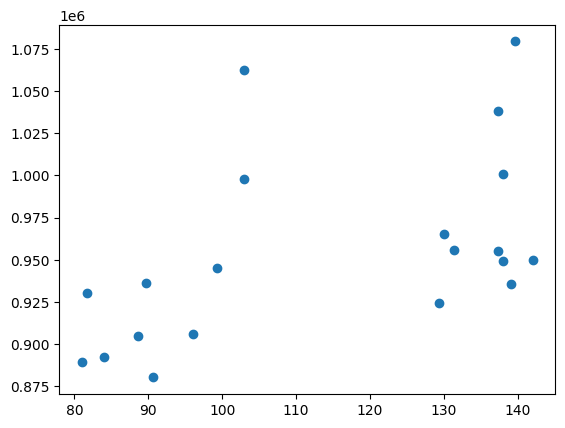

In [25]:
# Code cell 6
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

- **ANALYSIS**
- As of now, I can't see any relationship between the data that is plotted above. The menMeanSmarts represents the X-Axis while the MRI Count represents the Y axis. We can't say that as their IQ increases, the bigger is their brain. Their are points along the X-Axis, specifically around 130-140, where the size of their brain are similar to those points around 90-100.

Similarly, the code below creates a scatterplot graph for the women-only filtered dataframe.

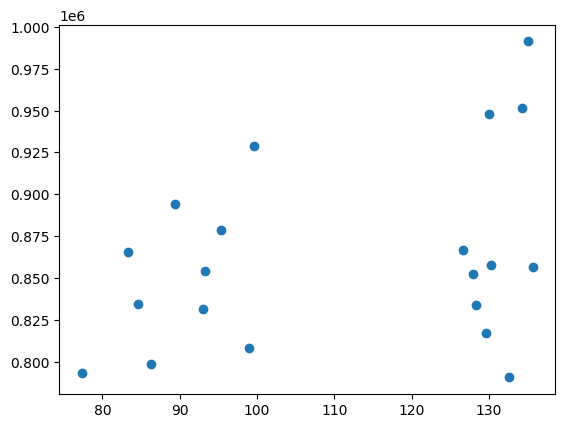

In [26]:
# Code cell 7
# Graph the women-only filtered dataframe
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])
plt.show()
%matplotlib inline

- ANALYSIS
- The same goes for the women scatter plot, I can see no relationship between their IQ and the size of their brain. The same is also true for this plot, the X-Axis is their IQ and the Y-Axis is the size of their brain.

## <span style = "color:red;"> Part 3: Calculating Correlation with Python </span>

#### Step 1: Calculate correlation against brainFrame.



The pandas corr() method provides an easy way to calculate correlation against a dataframe. By simply
calling the method against a dataframe, one can get the correlation between all variables at the same
time.

In [28]:
# Code cell 8
brainFrame.corr(method='pearson', numeric_only = True)

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


Notice at the left-to-right diagonal in the correlation table generated above.

Why is the diagonal filled
with 1s? Is that a coincidence? Explain
- ANSWER
- The diagonal rows of the table above is filled with 1s because they are the correlation of the rows to itself. For example, for the FSIQ, the row and column are meeting each other at the first cell of the first row, that's why it is equal to 1. This is not a coincidence but a naturally occuring value since the row and column have the same fields.

Still looking at the correlation table above, notice that the values are mirrored; values below the 1
diagonal have a mirrored counterpart above the 1 diagonal. Is that a coincidence? Explain.
- ANSWER
- The values below the 1 have a mirrored counterpart above the 1 because the rows and columns have the same fields. Having the same field, for rows and columns, this also means that they have the same value. So for every cell where the different columns and rows meet, they will have the same value for another cell that is mirrored to them.

Using the same corr() method, it is easy to calculate the correlation of the variables contained in the
female-only dataframe

In [29]:
# Code cell 9
womenDf.corr(method='pearson')

<ipython-input-29-a6271751808a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  womenDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


And the same can be done for the male-only dataframe:

In [30]:
# Code cell 10
# Use corr() for the male-only dataframe with the pearson method
menDf.corr(method = 'pearson')

<ipython-input-30-e6099c4c20d5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  menDf.corr(method = 'pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


## <span style = "color:red;"> Part 4: Visualizing </span>

#### Step 1: Install Seaborn.

To make it easier to visualize the data correlations, heatmap graphs can be used. Based on colored
squares, heatmap graphs can help identify correlations in a glance.
The Python module named seaborn makes it very easy to plot heatmap graphs.
First, run the cell below to download and install the seaborn module.

In [31]:
# Code cell 11
!pip install seaborn

#### Step 2: Plot the correlation heatmap

Now that the dataframes are ready, the heatmaps can be plotted. Below is a breakdown of the code in the
cell below:

Line 1: Generates a correlation table based on the womenNoGenderDf dataframe and stores it on wcorr.

Line 2: Uses the seaborn heatmap() method to generate and plot the heatmap. Notice that heatmap()
takes wcorr as a parameter.

Line 3: Use to export and save the generated heatmap as a PNG image. While the line 3 is not active (it
has the comment # character preceding it, forcing the interpreter to ignore it), it was kept for
informational purposes.

<Axes: >

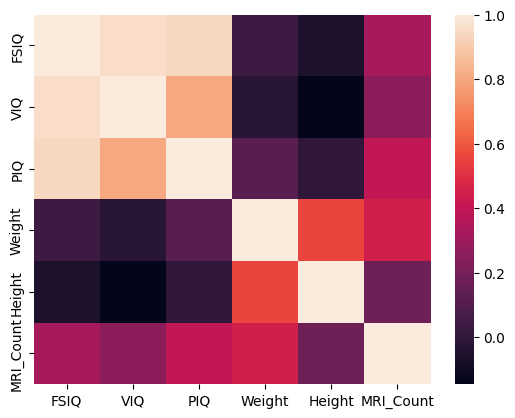

In [33]:
# Code cell 12
import seaborn as sns
wcorr = womenDf.corr(numeric_only = True)
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

- ANALYSIS
- As we can see from the heatmap above, we can see many blocks of color with dark color which means that they have little to no relationship with aligned row or column. If we focus with the column of MRI_Count, we can see that the lightest color there which represent the strongest correlation to it is the Weight. This means that they have a relationship with each other.

Similarly, the code below creates and plots a heatmap for the male-only dataframe.

<Axes: >

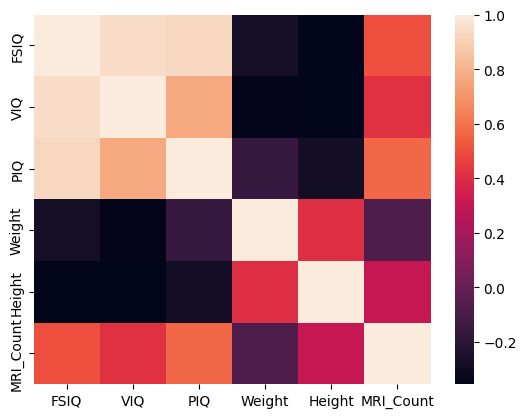

In [35]:
# Code cell 14
mcorr = menDf.corr(numeric_only = True)
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

- ANALYSIS
- For the dataframe of men, we can see a different result from the heatmap output of the dataframe of women. If we focus with the MRI_Count, we can see that the field with the strongest relationship to it is the PIQ column. This is the Performance Intelligence Column. This suggests that for men, their PIQ most likely contributes to the size of their brain.

Many variable pairs present correlation close to zero. What does that mean?
- This means that many variable pairs have no correlation with each other. They do not have relationship whatsoever, this means that if we increase or decrease the value of that certain pair, they will not most likely affect each other.

Why separate the genders?
- We separated the genders because men and women have a difference between their body sizes like height and weight. Generally, men have bigger physiques than women.

What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.
- For **women**, the variable with the strongest correlation with brain size is their weight because it has the lightest color in the variable pairs of the MRI_Count. This is a bit unexpected since the 3 fields of IQ should have a larger effect, but this also proves that for women, having a big brain has a weak relationship with their IQ. Their weight has a stronger relationship which means that having a higher or lower weight will affect the size of their brain.
While for **men**, the variable with strongest correlation with brain size is the PIQ field because it also has the lightest color. This is expected since having a high PIQ which is our ability to perform, also means that we have a bigger brain since we can have more neurons or processing power.

## <span style = "color:red;"> SUPPLEMENTARY ACTIVITY </span>

### The dataset context

- According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like g

## The contents of the dataset

Attribute Information

- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not

## Exploratory and Statistical Analysis

1. Create a dataframe from the downloaded CSV file

In [37]:
strokeFile = '/content/healthcare-dataset-stroke-data(1).csv'  #call the txt file by getting its path
strokeFrame = pd.read_csv(strokeFile, sep = ",")

2. Check if the dataframe is successfully separated and it recognizes each rows and columns

In [38]:
strokeFrame.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


3. Get the basic methods we use to get insights from the data collected by using describe() function

In [39]:
strokeFrame.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- ANALYSIS:

- We can see here that we have 5110 entries for this dataset and in the column of BMI we only have 4909 entries. This means that some of the respondents chose to not record their BMI and in the dataset this is labeled as Unknown. The mean age of the people in this entry is around 43 years old, which means that middle aged people are the majority who answered this dataset.

4. Separated them if needed. In my case, there is a BMI and since Male and Female genders have a big difference with their physiques, I separated them according to their genders.

In [42]:
maleDf = strokeFrame[(strokeFrame.gender == 'Male')]
femaleDf = strokeFrame[(strokeFrame.gender == 'Female')]

In [43]:
maleDf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5097,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [44]:
femaleDf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


5. We can now plot the graphs according to our needs.

In [46]:
strokeFrame.corr(method = "pearson", numeric_only = True)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [49]:
maleDf.corr(method = "pearson", numeric_only = True)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.013298,0.013488,-0.003761,0.003209,-0.013188,0.011018
age,0.013298,1.000000,0.267649,0.305070,0.265772,0.415576,0.257050
hypertension,0.013488,0.267649,1.000000,0.103479,0.169375,0.197743,0.109767
heart_disease,-0.003761,0.305070,0.103479,1.000000,0.143207,0.064699,0.158468
avg_glucose_level,0.003209,0.265772,0.169375,0.143207,1.000000,0.177780,0.166658
bmi,-0.013188,0.415576,0.197743,0.064699,0.177780,1.000000,0.062412
stroke,0.011018,0.257050,0.109767,0.158468,0.166658,0.062412,1.000000


In [50]:
femaleDf.corr(method = "pearson", numeric_only = True)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,-0.003477,-0.003840,0.000844,-0.000978,0.013978,0.003039
age,-0.003477,1.000000,0.284713,0.232249,0.219376,0.277642,0.236650
hypertension,-0.003840,0.284713,1.000000,0.112585,0.177210,0.149241,0.141716
heart_disease,0.000844,0.232249,0.112585,1.000000,0.176583,0.026610,0.113166
avg_glucose_level,-0.000978,0.219376,0.177210,0.176583,1.000000,0.178086,0.103835
bmi,0.013978,0.277642,0.149241,0.026610,0.178086,1.000000,0.029545
stroke,0.003039,0.236650,0.141716,0.113166,0.103835,0.029545,1.000000


- ANALYSIS:
- Here we used pearson correlation, where the value between ± 0.50 and ± 1 represents a strong correlation, the value between ± 0.30 and ± 0.49 represents a medium correlation, while the value below + . 29 represents a low correlation. Upon observing the pearson tables above and focusing in the stroke column, I can analyze that age is classified in a low correlation but it has the highest correlation with the stroke.

<Axes: >

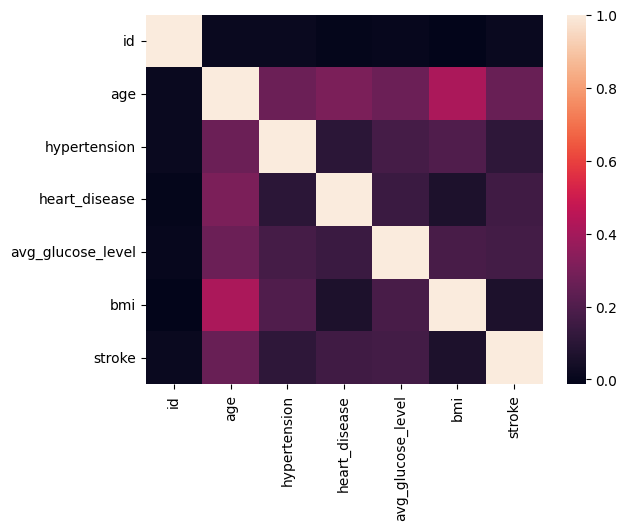

In [52]:
Mcorr = maleDf.corr(numeric_only = True)
sns.heatmap(Mcorr)

<Axes: >

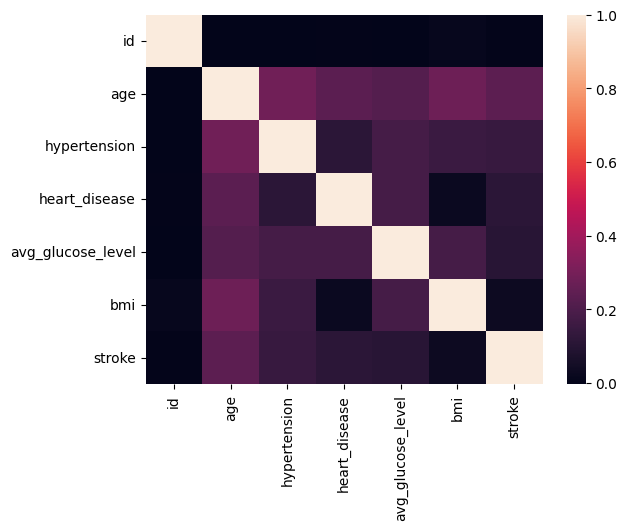

In [51]:
Fcorr = femaleDf.corr(numeric_only = True)
sns.heatmap(Fcorr)

- ANALYSIS
- We can see above the heatmap of correlation for the male gender of the dataset. The first thing that we will notice here is the sequence of black cells which is for the correlation of the ID field. This is normal since the ID field is just used for indexing. Now, if we focus on the field that we want to analyze, which is the stroke column, we can see that age has the strongest correlation to it in accordance with the pearson correlation table. The age has the lightest color in the variable pairs of the stroke field, although it is classified in the low correlation, we can still say that it has a higher effect compared to the other variables. We can conclude here that age can affect the chance of having a stroke. Most likely, the higher your age, the higher the chance of having a stroke.

## CONCLUSION/OBSERVATION:

 In this activity, I learned about the different function of the Pandas like describe() and read_csv(). We also utilized numpy and matplotlib for the statistical analysis of the dataset. For the visualization of the dataset, we utilized the seaborn for the heatmap correlation analysis. The seaborn allows us to easily analyze the dataset by using visualization techniques, where we use the color for analyzing the correlation of the dataset. In conclusion, I learned a lot with regards to exploratory and statistical analysis and I even applied it to real-life data like the stroke dataset that I found. I really enjoyed this activity and I hope to have more activities like this.